<a href="https://colab.research.google.com/github/sabih411/Answer/blob/main/expt4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

In [ ]:
import keras
from keras.datasets import mnist
from keras.layers import *
from keras.models import Sequential 
import random


(x_tr,y_tr),(x_te,y_te)=mnist.load_data()
x_tr_drawing=x_tr
print("x_train",x_tr[0])
print("y_train",y_tr[0])
print("x_train",x_tr.shape)
print("y_train",y_tr.shape)

11493376/11490434 [==============================] - 0s 0us/step
x_train [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0 

In [ ]:
image_size=784#28 X28
x_tr=x_tr.reshape(x_tr.shape[0],image_size)
x_te=x_te.reshape(x_te.shape[0],image_size)
print("x matrix after reshaping")
print("x train shape",x_tr.shape)
print("x test shape",x_te.shape)

num_classes=10
y_tr=keras.utils.to_categorical(y_tr,num_classes)
y_te=keras.utils.to_categorical(y_te,num_classes)

print("y after reshape")
print("y train shape",y_tr.shape)
print("y test shape",y_te.shape)


x matrix after reshaping
x train shape (60000, 784)
x test shape (10000, 784)
y after reshape
y train shape (60000, 10)
y test shape (10000, 10)


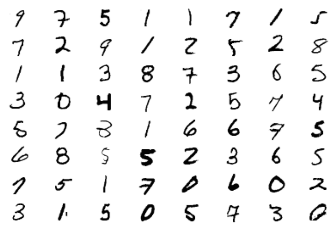

In [ ]:
for i in  range(64):
  ax=plt.subplot(8,8,i+1)
  ax.axis('off')
  plt.imshow(x_tr_drawing[random.randint(0,x_tr.shape[0])],cmap='Greys')


In [ ]:
model=Sequential()
model.add(Dense(units=25,activation='sigmoid',input_shape=(image_size,)))
model.add(Dense(units=num_classes,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                19625     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                260       
Total params: 19,885
Trainable params: 19,885
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x_tr,y_tr,batch_size=128,epochs=100,verbose=True,validation_split=.1)

Epoch 1/100
422/422 [==============================] - 2s 3ms/step - loss: 1.9007 - accuracy: 0.4119 - val_loss: 1.1247 - val_accuracy: 0.7980
Epoch 2/100
422/422 [==============================] - 1s 2ms/step - loss: 1.0877 - accuracy: 0.7867 - val_loss: 0.8298 - val_accuracy: 0.8525
Epoch 3/100
422/422 [==============================] - 1s 2ms/step - loss: 0.8343 - accuracy: 0.8348 - val_loss: 0.6570 - val_accuracy: 0.8817
Epoch 4/100
422/422 [==============================] - 1s 2ms/step - loss: 0.6977 - accuracy: 0.8554 - val_loss: 0.5726 - val_accuracy: 0.8922
Epoch 5/100
422/422 [==============================] - 1s 2ms/step - loss: 0.6157 - accuracy: 0.8681 - val_loss: 0.5050 - val_accuracy: 0.8980
Epoch 6/100
422/422 [==============================] - 1s 2ms/step - loss: 0.5575 - accuracy: 0.8742 - val_loss: 0.4675 - val_accuracy: 0.9057
Epoch 7/100
422/422 [==============================] - 1s 2ms/step - loss: 0.5147 - accuracy: 0.8845 - val_loss: 0.4253 - val_accuracy: 0.9063

In [ ]:
loss,accuracy=model.evaluate(x_te,y_te,verbose=True)


313/313 [==============================] - 0s 1ms/step - loss: 0.2501 - accuracy: 0.9259


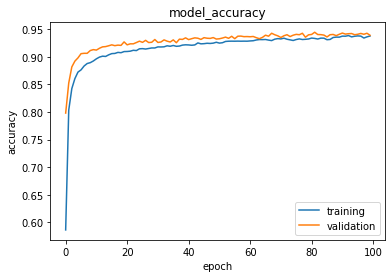

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'],loc='best')
plt.show()

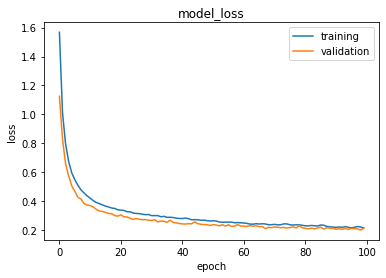

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training','validation'],loc='best')
plt.show()


In [ ]:
model1=Sequential()
model1.add(Dense(units=50,activation='sigmoid',input_shape=(image_size,)))
model1.add(Dense(units=num_classes,activation='softmax'))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
history=model1.fit(x_tr,y_tr,batch_size=128,epochs=100,verbose=True,validation_split=.1)

Epoch 1/100
422/422 [==============================] - 1s 3ms/step - loss: 1.6495 - accuracy: 0.5178 - val_loss: 0.8032 - val_accuracy: 0.8462
Epoch 2/100
422/422 [==============================] - 1s 2ms/step - loss: 0.7917 - accuracy: 0.8301 - val_loss: 0.5665 - val_accuracy: 0.8893
Epoch 3/100
422/422 [==============================] - 1s 2ms/step - loss: 0.6034 - accuracy: 0.8666 - val_loss: 0.4600 - val_accuracy: 0.9013
Epoch 4/100
422/422 [==============================] - 1s 2ms/step - loss: 0.5067 - accuracy: 0.8813 - val_loss: 0.4035 - val_accuracy: 0.9120
Epoch 5/100
422/422 [==============================] - 1s 3ms/step - loss: 0.4453 - accuracy: 0.8946 - val_loss: 0.3651 - val_accuracy: 0.9165
Epoch 6/100
422/422 [==============================] - 1s 2ms/step - loss: 0.4132 - accuracy: 0.8981 - val_loss: 0.3363 - val_accuracy: 0.9227
Epoch 7/100
422/422 [==============================] - 1s 2ms/step - loss: 0.3829 - accuracy: 0.9042 - val_loss: 0.3296 - val_accuracy: 0.9222

In [ ]:
loss,accuracy=model1.evaluate(x_te,y_te,verbose=True)


313/313 [==============================] - 0s 957us/step - loss: 0.1827 - accuracy: 0.9458


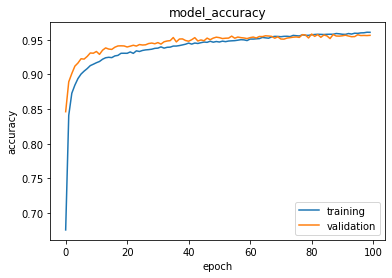

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'],loc='best')
plt.show()

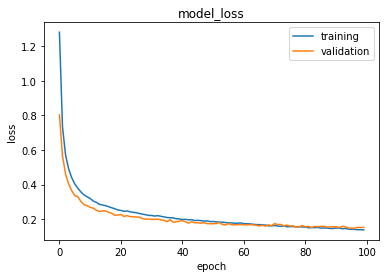

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training','validation'],loc='best')
plt.show()


In [ ]:
model2=Sequential()
model2.add(Dense(units=100,activation='sigmoid',input_shape=(image_size,)))
model2.add(Dense(units=num_classes,activation='softmax'))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
history=model2.fit(x_tr,y_tr,batch_size=128,epochs=100,verbose=True,validation_split=.1)

Epoch 1/100
422/422 [==============================] - 2s 3ms/step - loss: 1.5269 - accuracy: 0.5567 - val_loss: 0.6118 - val_accuracy: 0.8770
Epoch 2/100
422/422 [==============================] - 1s 3ms/step - loss: 0.6213 - accuracy: 0.8535 - val_loss: 0.4285 - val_accuracy: 0.9085
Epoch 3/100
422/422 [==============================] - 1s 3ms/step - loss: 0.4736 - accuracy: 0.8851 - val_loss: 0.3625 - val_accuracy: 0.9185
Epoch 4/100
422/422 [==============================] - 1s 3ms/step - loss: 0.4047 - accuracy: 0.8987 - val_loss: 0.3182 - val_accuracy: 0.9218
Epoch 5/100
422/422 [==============================] - 1s 3ms/step - loss: 0.3664 - accuracy: 0.9068 - val_loss: 0.2925 - val_accuracy: 0.9268
Epoch 6/100
422/422 [==============================] - 1s 3ms/step - loss: 0.3377 - accuracy: 0.9119 - val_loss: 0.2741 - val_accuracy: 0.9313
Epoch 7/100
422/422 [==============================] - 1s 3ms/step - loss: 0.3169 - accuracy: 0.9162 - val_loss: 0.2572 - val_accuracy: 0.9350

In [ ]:
loss,accuracy=model2.evaluate(x_te,y_te,verbose=True)


313/313 [==============================] - 0s 1ms/step - loss: 0.1377 - accuracy: 0.9603


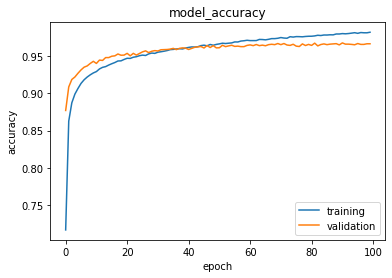

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'],loc='best')
plt.show()

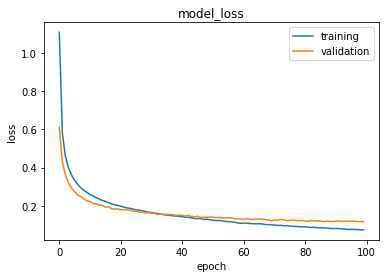

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training','validation'],loc='best')
plt.show()


In [ ]:
model3=Sequential()
model3.add(Dense(units=200,activation='sigmoid',input_shape=(image_size,)))
model3.add(Dense(units=num_classes,activation='softmax'))
model3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                2010      
Total params: 159,010
Trainable params: 159,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model3.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
history=model3.fit(x_tr,y_tr,batch_size=128,epochs=100,verbose=True,validation_split=.1)

Epoch 1/100
422/422 [==============================] - 2s 4ms/step - loss: 1.3442 - accuracy: 0.6142 - val_loss: 0.4966 - val_accuracy: 0.8897
Epoch 2/100
422/422 [==============================] - 2s 4ms/step - loss: 0.5147 - accuracy: 0.8733 - val_loss: 0.3663 - val_accuracy: 0.9103
Epoch 3/100
422/422 [==============================] - 2s 4ms/step - loss: 0.4026 - accuracy: 0.8957 - val_loss: 0.3053 - val_accuracy: 0.9243
Epoch 4/100
422/422 [==============================] - 2s 4ms/step - loss: 0.3487 - accuracy: 0.9057 - val_loss: 0.2789 - val_accuracy: 0.9287
Epoch 5/100
422/422 [==============================] - 2s 4ms/step - loss: 0.3065 - accuracy: 0.9152 - val_loss: 0.2587 - val_accuracy: 0.9327
Epoch 6/100
422/422 [==============================] - 2s 4ms/step - loss: 0.2877 - accuracy: 0.9220 - val_loss: 0.2401 - val_accuracy: 0.9385
Epoch 7/100
422/422 [==============================] - 2s 4ms/step - loss: 0.2676 - accuracy: 0.9265 - val_loss: 0.2278 - val_accuracy: 0.9413

In [ ]:
loss,accuracy=model3.evaluate(x_te,y_te,verbose=True)


313/313 [==============================] - 0s 1ms/step - loss: 0.1259 - accuracy: 0.9608


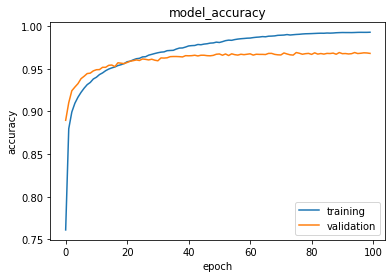

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'],loc='best')
plt.show()